## Multiple Linear Regression - *(BMI)*
**Data Columns :**
1. Country
1. Age
1. Weight
1. Height 
1. Gymnast
1. Gender
1. PAL
1. BMI 

**NB :**
+ *PAL implies Physical Activity Level*
+ *Gymnast indicates gym membership and regular exercies*

### Load Data

In [1]:
import pandas as pd
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('bmi.csv')

### Basic Descriptive Analysis

In [3]:
print(data.head(3))

   Country  Age     Weight      Height  Gym  Gender        BMI   PAL
0     Togo   24  55.957519  169.642187    1  Female  19.444229  1.55
1  Tunisia   52  83.290916  171.698149    0  Female  28.253120  1.90
2  Nigeria   56  58.045245  199.188147    1  Female  14.629843  1.55


In [4]:
print(data.shape)

(10000, 8)


In [5]:
print(data.describe())

                Age        Weight        Height           Gym           BMI  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      40.657700     75.175557    175.344317      0.492400     24.955689   
std       13.569456     14.446026     14.431918      0.499967      6.380260   
min       18.000000     50.005931    150.002425      0.000000     12.684975   
25%       29.000000     62.661566    162.821081      0.000000     20.100333   
50%       40.000000     75.162219    175.425133      0.000000     24.303508   
75%       52.000000     87.646193    187.977905      1.000000     29.114493   
max       64.000000     99.998682    199.997311      1.000000     44.002189   

                PAL  
count  10000.000000  
mean       1.548863  
std        0.248405  
min        1.200000  
25%        1.375000  
50%        1.550000  
75%        1.725000  
max        1.900000  


In [6]:
data.columns = [s.lower() for s in data.columns]
data.columns

Index(['country', 'age', 'weight', 'height', 'gym', 'gender', 'bmi', 'pal'], dtype='object')

In [7]:
list_string_columns =  ['country', 'gender']
list_numeric_columns = ['age', 'weight', 'height', 'gym', 'pal', 'bmi']
predictor_vars = ['country', 'age', 'weight', 'height', 'gym', 'gender', 'pal']
dependent_var = ['bmi']
list_string_columns, list_numeric_columns

(['country', 'gender'], ['age', 'weight', 'height', 'gym', 'pal', 'bmi'])

### Data Cleaning

In [8]:
if data.isnull().sum().any().sum() > 0 : 
    data.dropna(inplace=True)

if data[data.duplicated()].any().any(): 
    data.drop_duplicates(inplace=True)

### Exploratory Analysis

In [9]:
print('Unique Countries: ',data.country.unique())
print('Unique Gender',data.gender.unique())

Unique Countries:  ['Togo' 'Tunisia' 'Nigeria' 'Ghana' 'Egypt' 'Cameroun' 'Mali']
Unique Gender ['Female' 'Male']


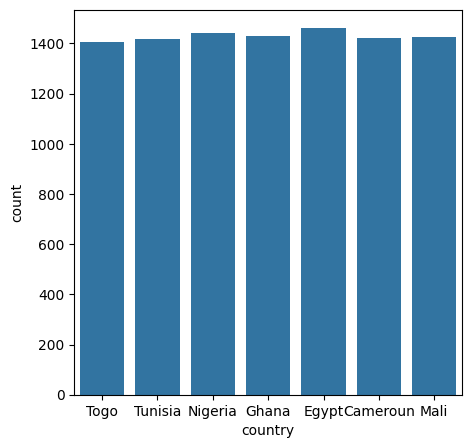

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x= data['country'])
plt.show()

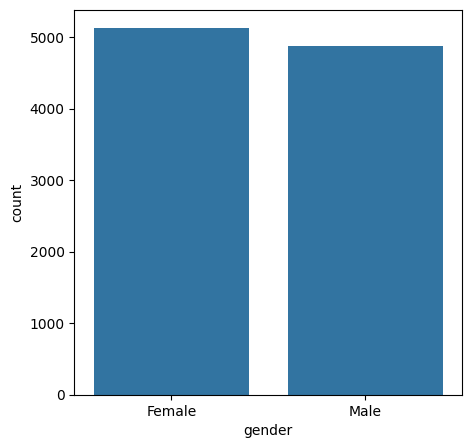

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x= data['gender'])
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'gym'}>],
       [<Axes: title={'center': 'pal'}>, <Axes: title={'center': 'bmi'}>]],
      dtype=object)

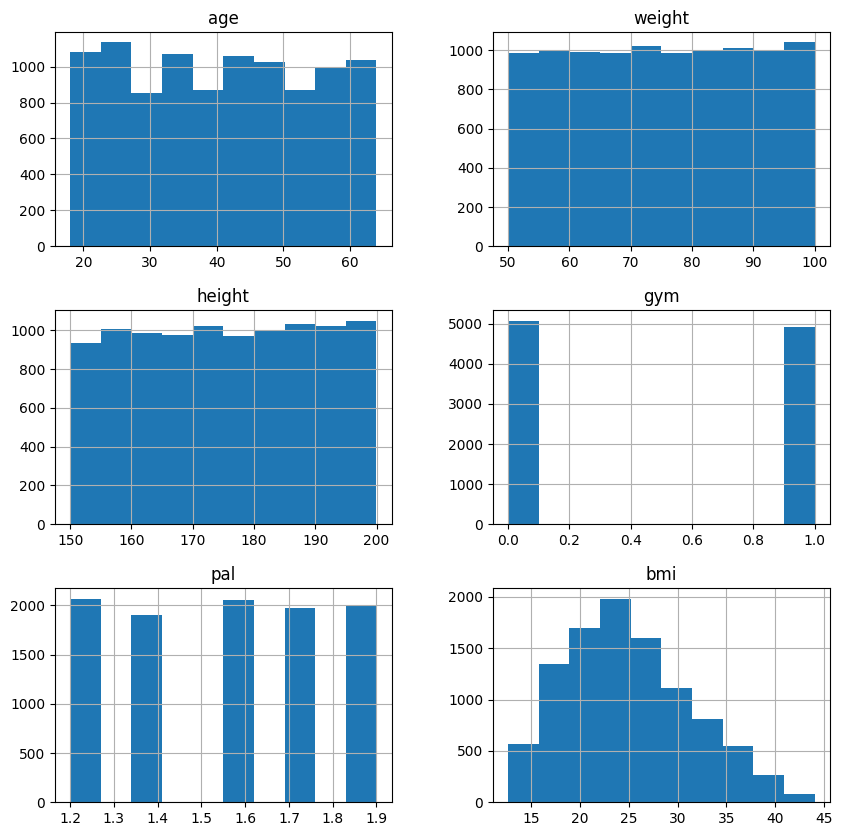

In [12]:
data[list_numeric_columns].hist(figsize=(10,10))

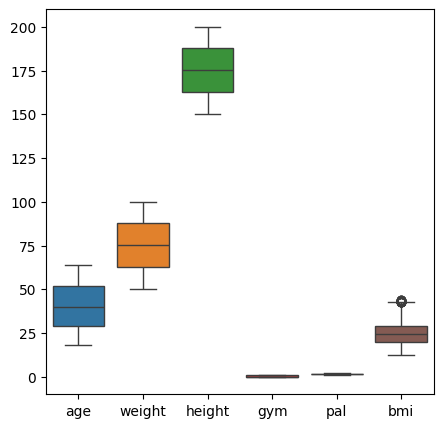

In [13]:
plt.figure(figsize=(5,5))
sns.boxplot(data[list_numeric_columns])
plt.show()

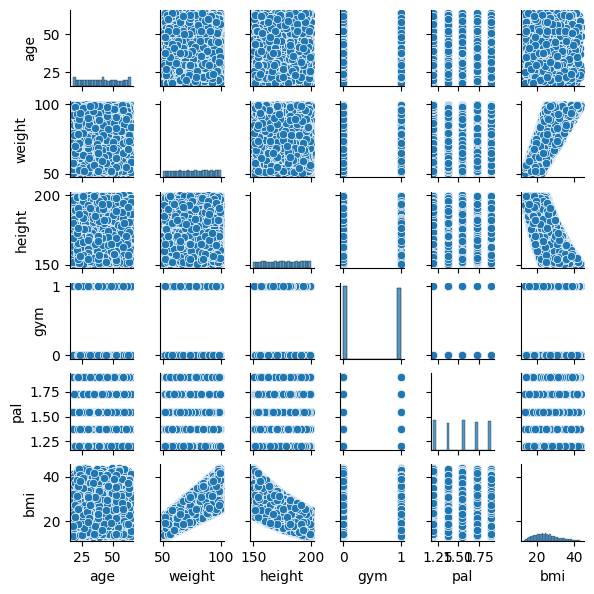

In [14]:
sns.pairplot(data=data[list_numeric_columns], height=1)

             age    weight    height       gym       pal       bmi
age     1.000000  0.010786 -0.012301 -0.002057  0.001977  0.016050
weight  0.010786  1.000000  0.003023 -0.012812  0.012292  0.749023
height -0.012301  0.003023  1.000000  0.009620 -0.006668 -0.644571
gym    -0.002057 -0.012812  0.009620  1.000000 -0.006341 -0.015690
pal     0.001977  0.012292 -0.006668 -0.006341  1.000000  0.016106
bmi     0.016050  0.749023 -0.644571 -0.015690  0.016106  1.000000


<Axes: >

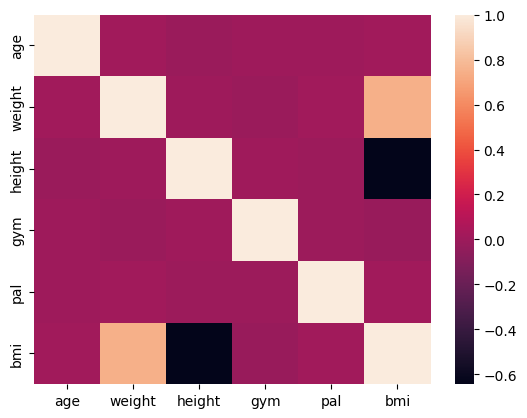

In [15]:
correlation = data[list_numeric_columns].corr()
print(correlation)
sns.heatmap(correlation)

### Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder # type: ignore
encoder = LabelEncoder()
data.country = encoder.fit_transform(data['country'])
data.gender = encoder.fit_transform(data['gender'])
print(data[list_string_columns].head())

   country  gender
0        5       0
1        6       0
2        4       0
3        2       0
4        1       1


### Scaling

In [17]:
from sklearn.model_selection import train_test_split

x = data[predictor_vars]
y = data[dependent_var]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1234)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train[predictor_vars]), columns=predictor_vars)
x_test = pd.DataFrame(scaler.transform(x_test[predictor_vars]), columns=predictor_vars)

### ** Feature Selection - Variance Threshold

In [19]:
from sklearn.feature_selection import VarianceThreshold

threshold = VarianceThreshold(.0)
threshold.fit_transform(data)
threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Model Development

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)
score = model.score(x_test,y_test)


In [21]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

r2_score = r2_score(y_test, y_predict)
rmse = root_mean_squared_error(y_test, y_predict)
mse = mean_squared_error(y_test,y_predict)

### Results

In [22]:
print(f'score    : {score}')
print(f'r2_score : {r2_score}')
print(f'rmse     : {rmse}')
print(f'mse      : {mse}')

score    : 0.9795999366699961
r2_score : 0.9795999366699961
rmse     : 0.9062384625626291
mse      : 0.8212681510278776
